In [1]:
import pickle as pk
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.append('/Users/yoavfreund/projects/shapeology/shapeology_code/scripts/')
sys.path

['',
 '/Users/yoavfreund/projects/shapeology/shapeology_code/notebooks',
 '/Users/yoavfreund/projects/shapeology/shapeology_code/notebooks/~/anaconda3/lib/python3.6/site-packages',
 '/Users/yoavfreund/projects/shapeology/shapeology_code/notebooks/~/anaconda/lib/python2.7/site-packages',
 '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages',
 '/usr/local/lib/python2.7/site-packages',
 '/Users/yoavfreund/spark-latest/python/lib/py4j-0.9-src.zip',
 '/Users/yoavfreund/spark-latest/python',
 '/Users/yoavfreund/python_packages',
 '/Users/yoavfreund/anaconda3/lib/python3.6/site-packages/vtk',
 '/anaconda3/lib/python37.zip',
 '/anaconda3/lib/python3.7',
 '/anaconda3/lib/python3.7/lib-dynload',
 '/anaconda3/lib/python3.7/site-packages',
 '/anaconda3/lib/python3.7/site-packages/aeosa',
 '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/extensions',
 '/Users/yoavfreund/.ipython',
 '/Users/yoavfreund/projects/shapeology/shapeology_cod

In [3]:
from patch_normalizer import normalizer
Norm=normalizer()

In [11]:
D=pk.load(open('../../data/tiles/tiles_743_extracted.pkl','rb'))

In [12]:
D[0].keys()

dict_keys(['i', 'X', 'Y', 'original_patch', 'normalized_patch', 'rotation', 'confidence'])

rotation= 30.681036428356354 confidence= 156.60219169312862


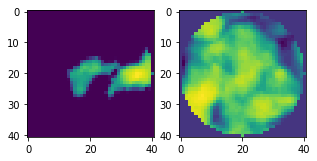

In [13]:
i=2
R=D[i]
print('rotation=',R['rotation'],'confidence=',R['confidence'])
figure(figsize=(5,10))
subplot(121)
imshow(R['normalized_patch'])
subplot(122)
imshow(R['original_patch']);

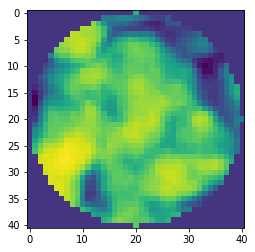

In [14]:
ex=R['original_patch']
imshow(ex)

In [15]:
masked_patch,labels=Norm.segment_patch(ex)

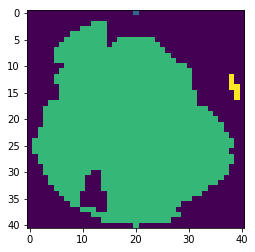

In [16]:
imshow(labels);

In [17]:
ex=R['normalized_patch']
Norm.angle(ex)

(-0.04063114559403003, 1410.1433828029794)

In [18]:
patches=[c['normalized_patch'] for c in D]
conf=np.array([c['confidence'] for c in D])

conf[:5]

array([2238.04161381, 1433.22636743,  156.60219169,  387.62823791,
        742.37074094])

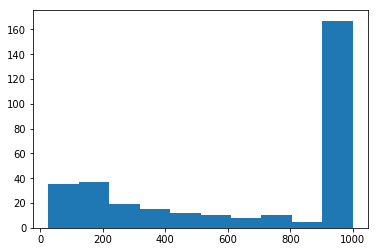

In [19]:
thr=1000
conf[conf>thr]=thr
hist(conf);

In [20]:
import sys
sys.path.append('/Users/yoavfreund/projects/shapeology/shapeology_code/scripts/')

In [21]:
from lib.shape_utils import plot_patches,pack_pics

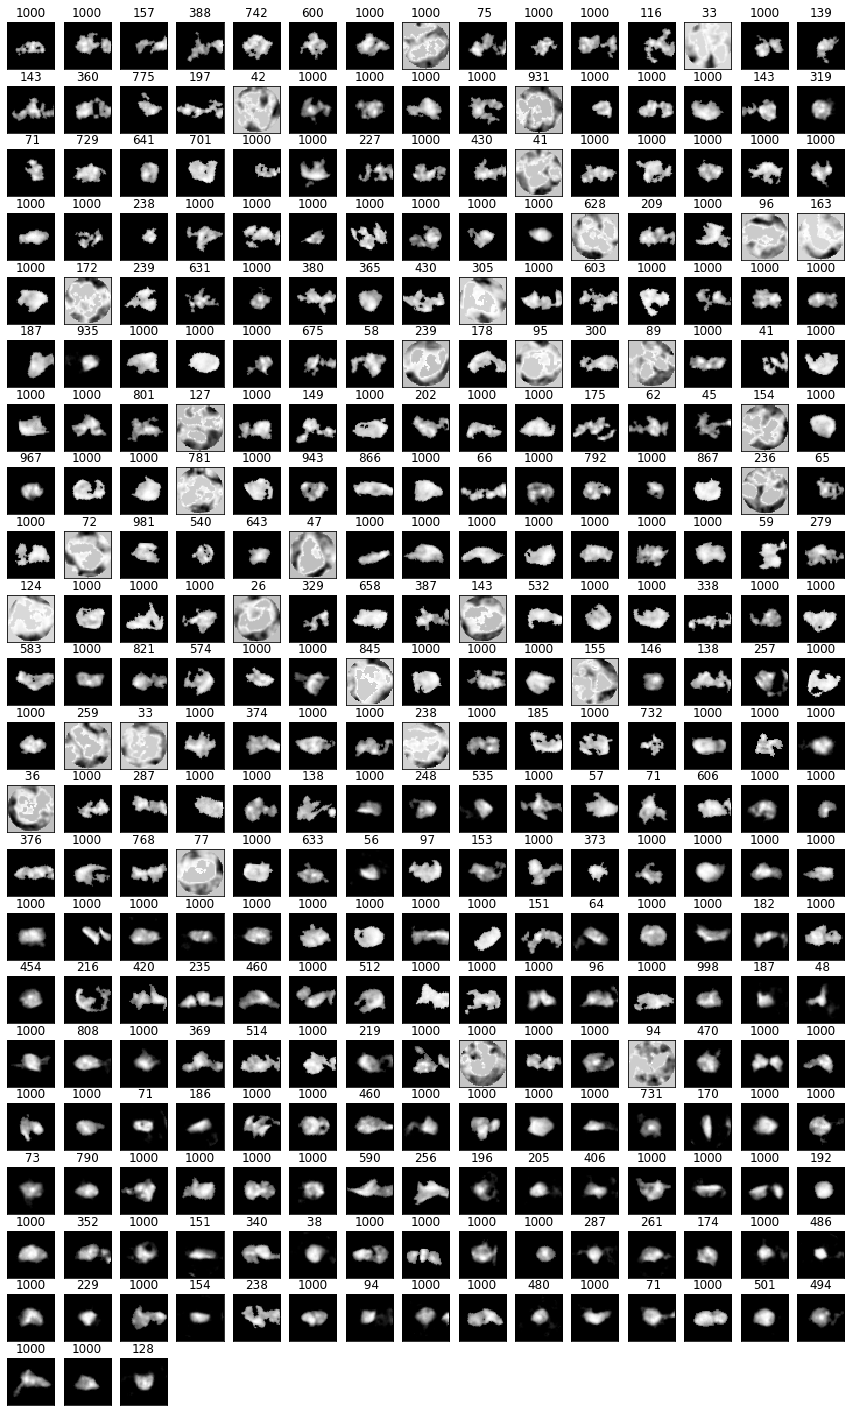

In [22]:
fig=figure(figsize=[15,70])
plot_patches(fig,pack_pics(patches),h=60,w=15,_titles=['%3.0f'%conf[i] for i in range(conf.shape[0])])

In [ ]:
from skimage.measure import label

In [ ]:
patch=-copy(patches[-30])
thr=0.6
binary=(patch<thr)*1
labels,num=label(binary,connectivity=2,background=1,return_num=True)
mask=(labels==labels[25,25])
print(binary[0,0])
masked_patch=patch*mask
imshow(masked_patch)

In [ ]:
hist(-patch.flatten());

In [ ]:
std(patch.flatten())